Generation 0: Best Fitness = 1.3134
Generation 10: Best Fitness = 1.2520
Generation 20: Best Fitness = 1.2520
Generation 30: Best Fitness = 1.2520
Generation 40: Best Fitness = 1.2520

Best Solution Found:
x = 0.2540, f(x) = 1.2520


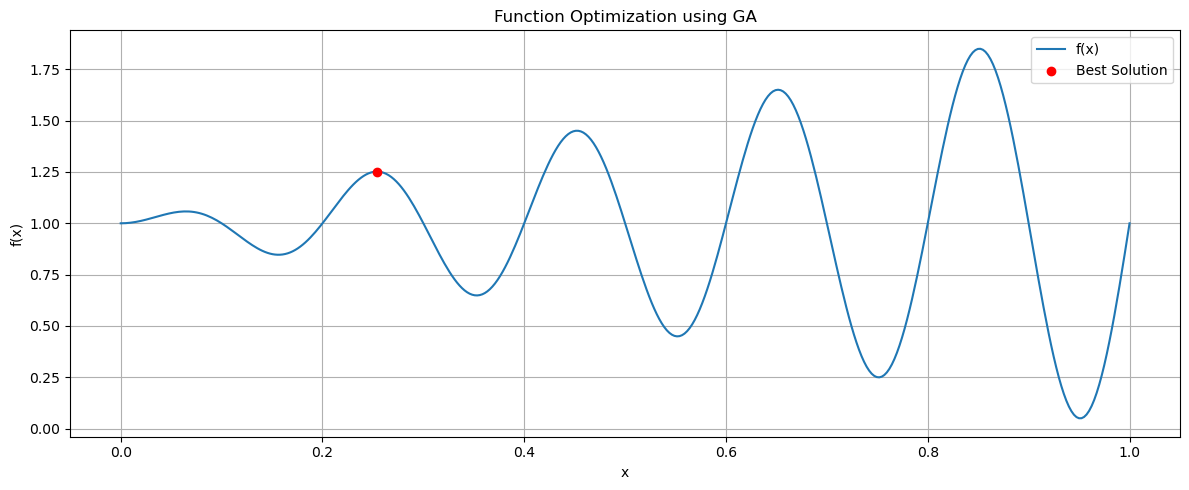

In [1]:
# --------------------------------------------
# Genetic Algorithm (GA) - Function Optimization
# --------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the objective function to maximize
def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1.0  # sample nonlinear function

# Step 2: Create initial population (random values between 0 and 1)
population_size = 20
num_generations = 50
mutation_rate = 0.1

population = np.random.rand(population_size)

# Step 3: Define helper functions
def selection(pop, fitness):
    """Select two parents using tournament selection."""
    idx = np.random.choice(len(pop), 4, replace=False)
    selected = sorted(idx, key=lambda i: fitness[i], reverse=True)
    return pop[selected[0]], pop[selected[1]]

def crossover(parent1, parent2):
    """Single-point crossover."""
    point = np.random.rand()
    child = point * parent1 + (1 - point) * parent2
    return child

def mutate(child):
    """Random mutation."""
    if np.random.rand() < mutation_rate:
        child += np.random.uniform(-0.1, 0.1)
        child = np.clip(child, 0, 1)  # keep within [0,1]
    return child

# Step 4: Run the GA
best_fitness_history = []

for gen in range(num_generations):
    fitness = fitness_function(population)
    new_population = []

    for _ in range(population_size):
        parent1, parent2 = selection(population, fitness)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)
    
    population = np.array(new_population)
    best_fitness = np.max(fitness)
    best_fitness_history.append(best_fitness)
    
    if gen % 10 == 0:
        print(f"Generation {gen}: Best Fitness = {best_fitness:.4f}")

# Step 5: Get final best solution
best_idx = np.argmax(fitness_function(population))
best_x = population[best_idx]
best_y = fitness_function(best_x)

print("\nBest Solution Found:")
print(f"x = {best_x:.4f}, f(x) = {best_y:.4f}")

# Step 6: Visualization
x = np.linspace(0, 1, 400)
y = fitness_function(x)

plt.figure(figsize=(12, 5))
plt.plot(x, y, label='f(x)')
plt.scatter(best_x, best_y, color='red', label='Best Solution', zorder=5)
plt.title('Function Optimization using GA')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
